<a href="https://colab.research.google.com/github/yuktiverma43/Data-Science-Projects/blob/main/Git_Hub_ReCell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ReCell Project**

**Business Context**

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

**Objective**

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

**Data Description**

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

**brand_name:** Name of manufacturing brand

**os:** OS on which the device runs

**screen_size:** Size of the screen in cm

**4g:** Whether 4G is available or not

**5g:** Whether 5G is available or not

**main_camera_mp:** Resolution of the rear camera in megapixels

**selfie_camera_mp:** Resolution of the front camera in megapixels

**int_memory:** Amount of internal memory (ROM) in GB

**ram:** Amount of RAM in GB

**battery:** Energy capacity of the device battery in mAh

**weight:** Weight of the device in grams

**release_year:** Year when the device model was released

**days_used:** Number of days the used/refurbished device has been used

**normalized_new_price:** Normalized price of a new device of the same model in euros

**normalized_used_price:** Normalized price of the used/refurbished device in euros

**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Overview**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/used_device_data.csv')

In [ ]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
data.shape

(3454, 15)

In [ ]:
data.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [ ]:
data.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


**Observations**


1. The data type of brand name, O.S, 4g and 5g are is object where as data type of screen size, main camera mp, selfie camera mp, int memory, ram, battery, weight, normalized used price and normalized new price is float & data type of release year and days used is int.
2. There are 3454 rows and 15 columns.
3. The minimum screen size is approximately 5 cms and maximum is 30 cms. Median is 13 cms.
4. The maximum megapixel for main camera is 48 mp and median is 8 mp.
5. The maximum megapixel for selfie camera is 32mp and median is 5 mp. 75% of the devices have less than 13 mp as selfie camera.
6. 25% of the devices have internal memory less than 16 GB and median is 32 GB while 75% of devices have internal memory less than 64GB and maximum internal memory is 1024GB.
7. RAM of devices can be between 0 to maximum of 12 GB with median as 4GB.
8. The maximum battery of device is 9720 mAh.
9. Weight of device lies between 69 gms to 855 gms while median weight is 160 gms. It means 50% of devices have weight less than 160 gms.
10. Devices were launched between 2013 to 2020.
11. The minimum no of days device is used is 91 days and maximum no of days device is used is 1094 days with mean as 249 days.
12. There are null values present in data set.

**Exploratory Data Analysis (EDA)**

**Univariate Analysis**

In [ ]:
col=data.columns
col

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

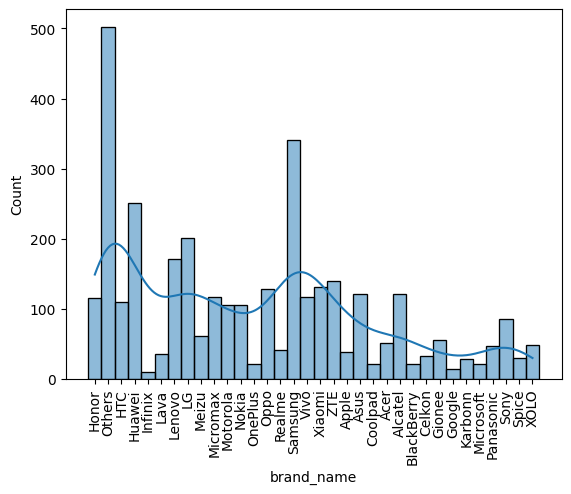

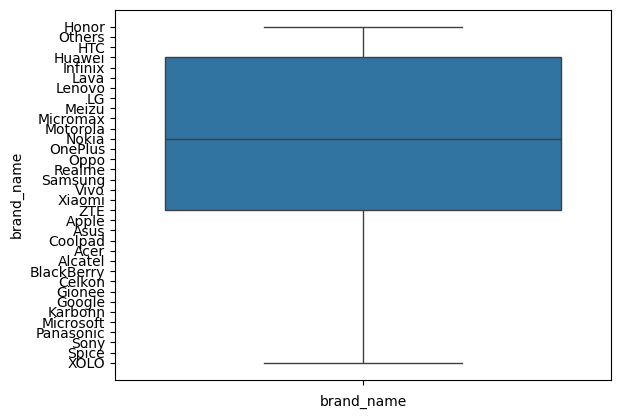

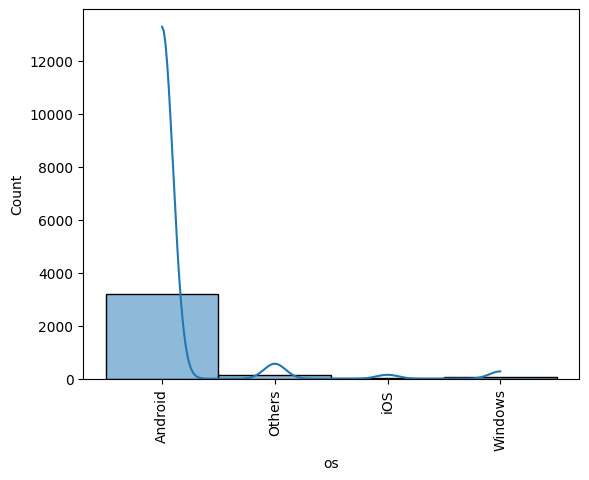

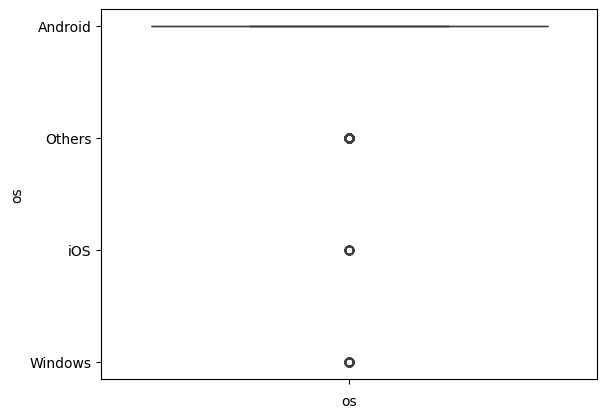

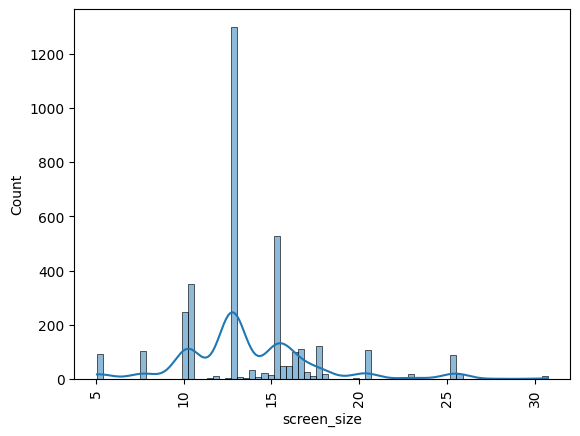

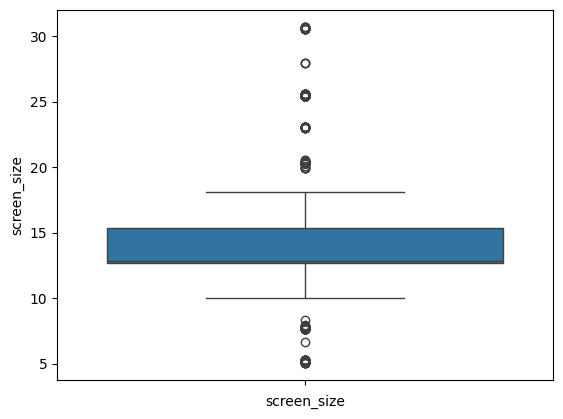

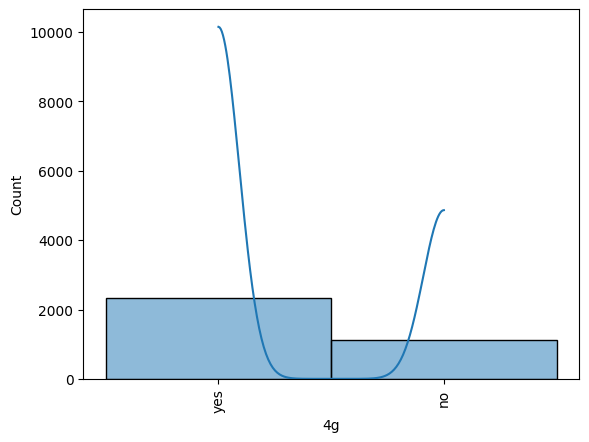

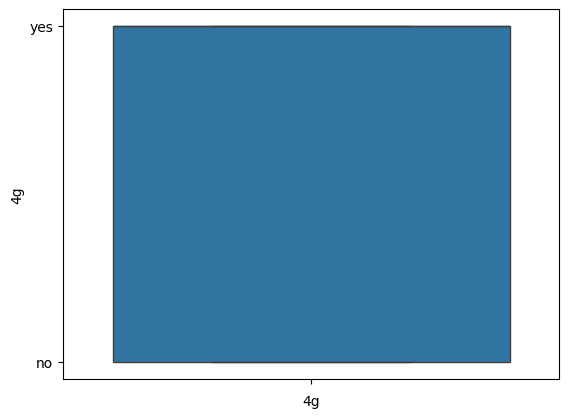

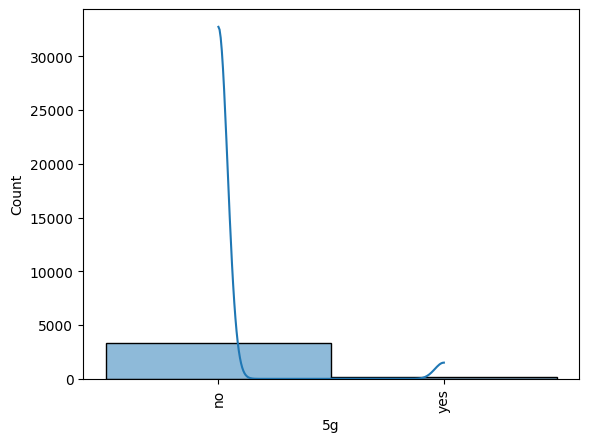

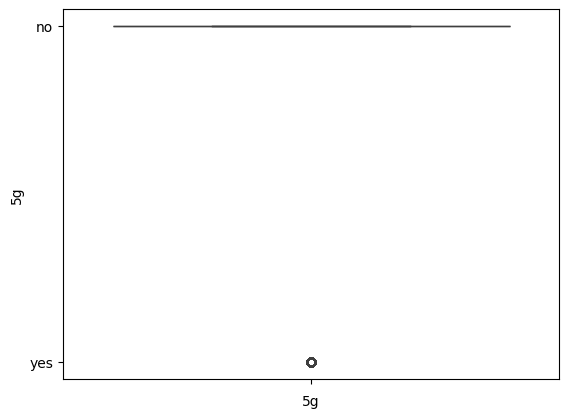

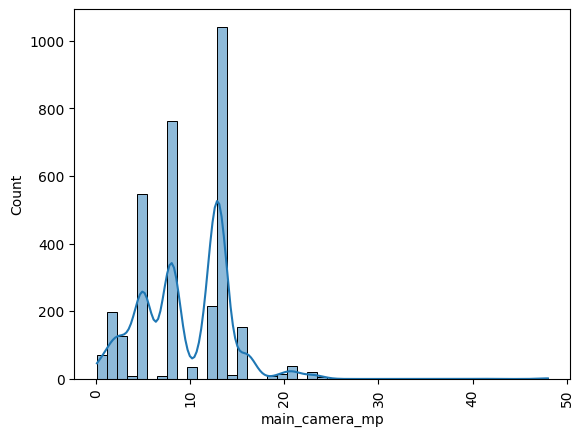

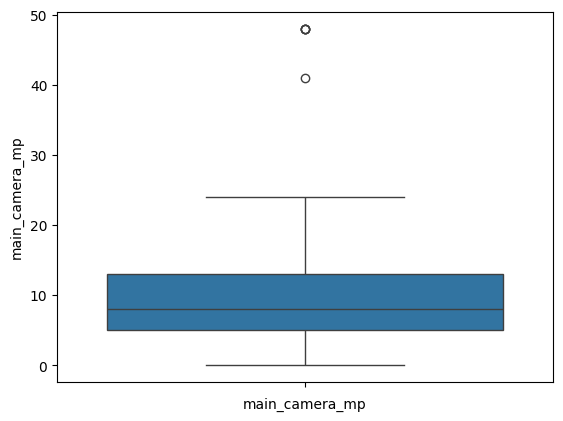

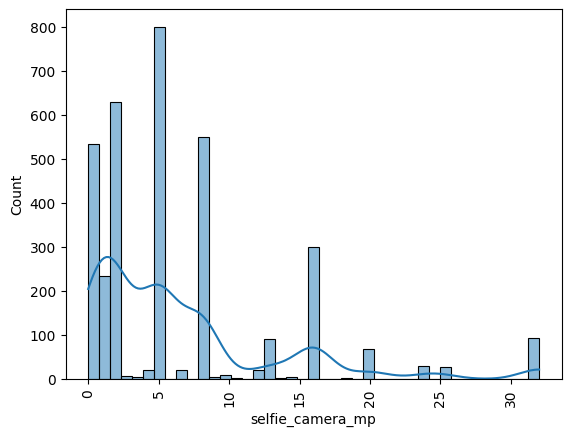

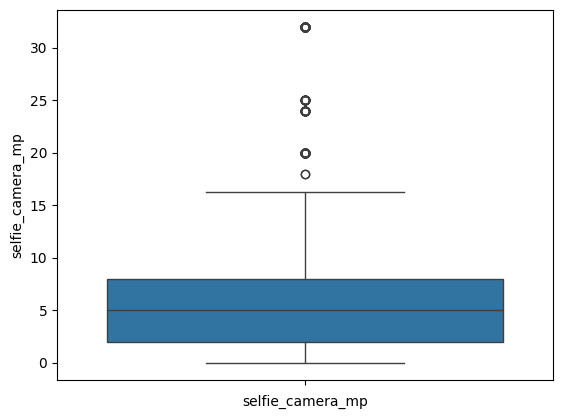

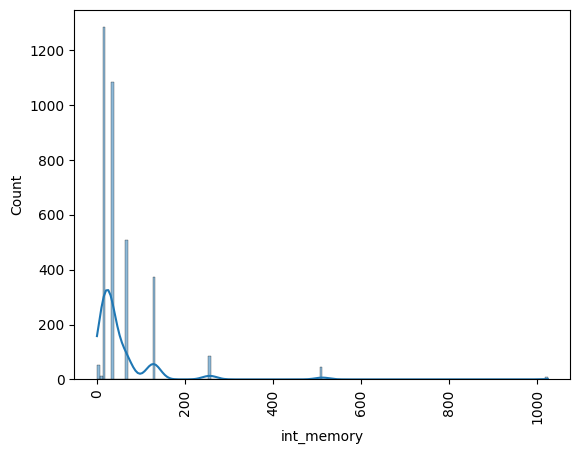

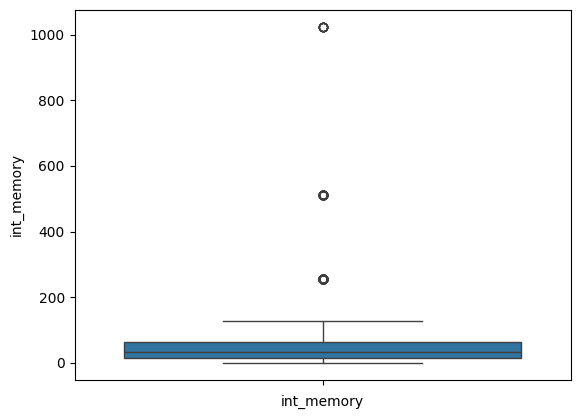

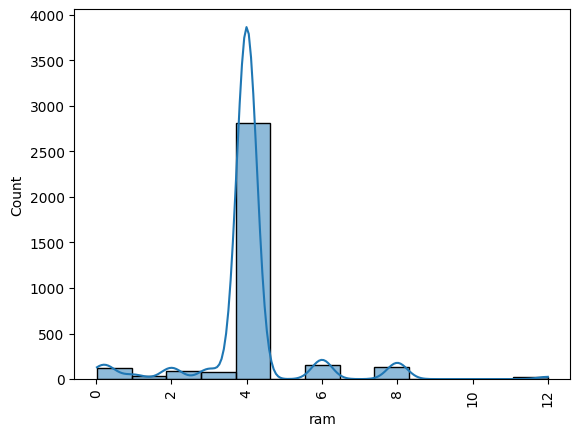

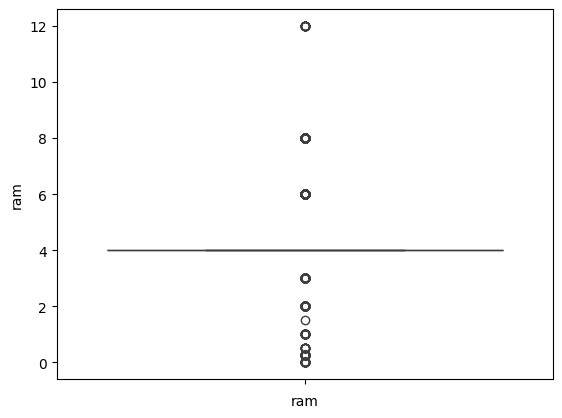

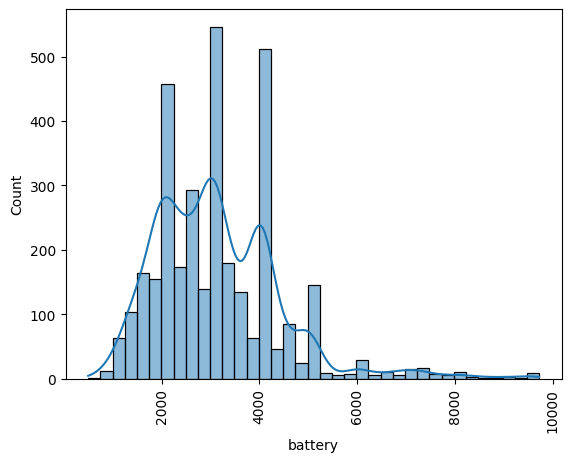

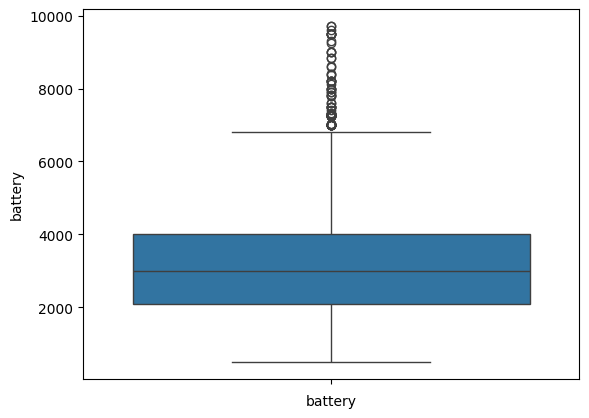

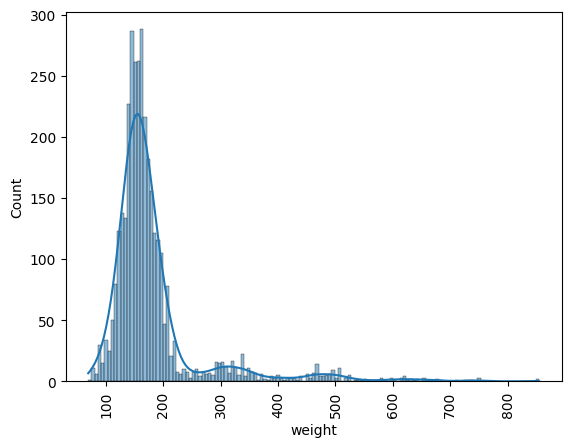

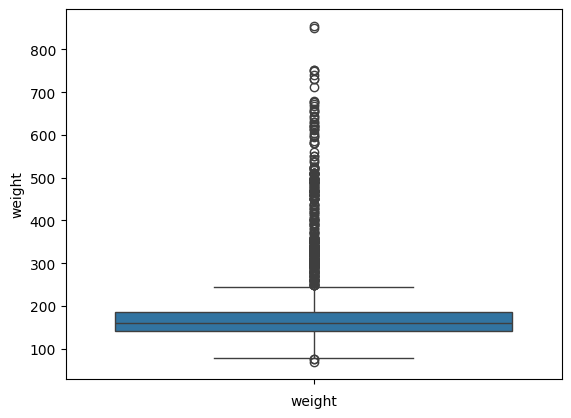

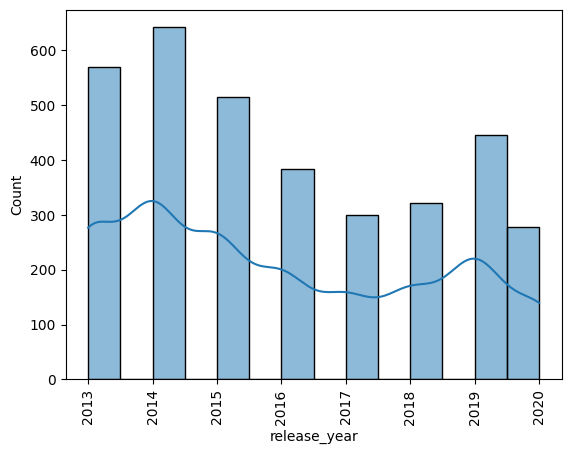

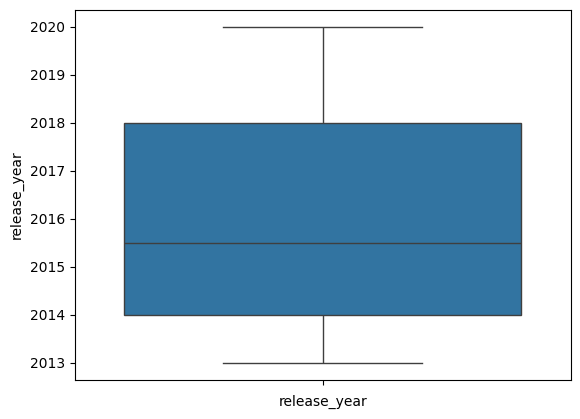

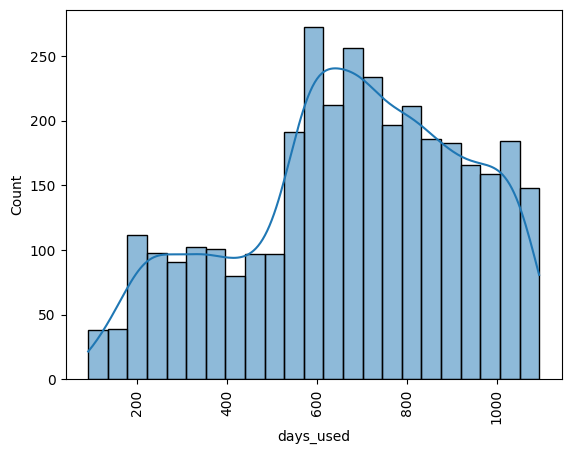

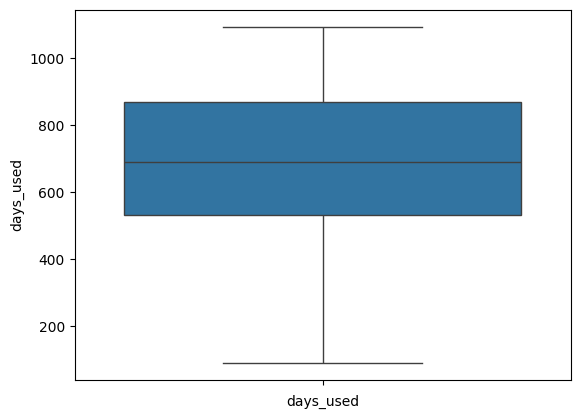

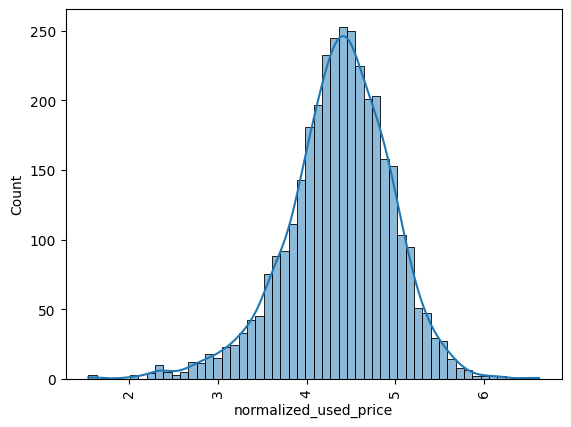

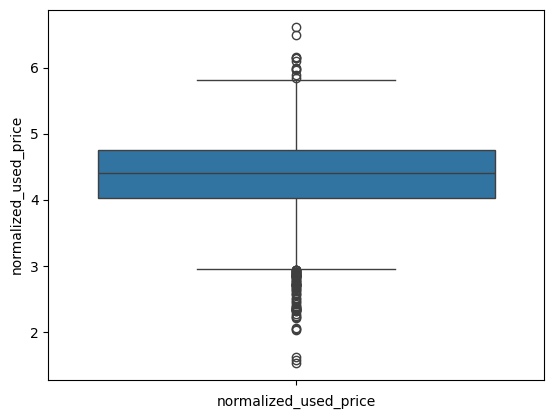

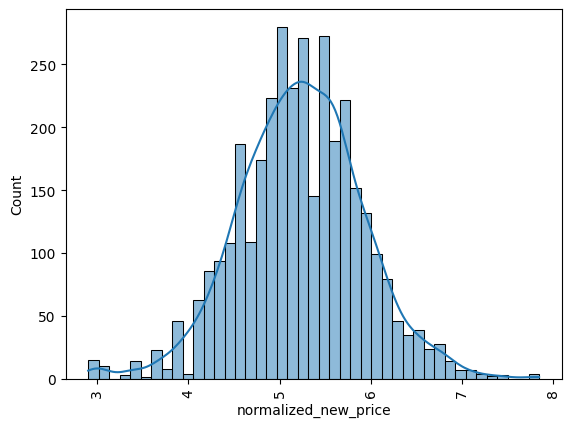

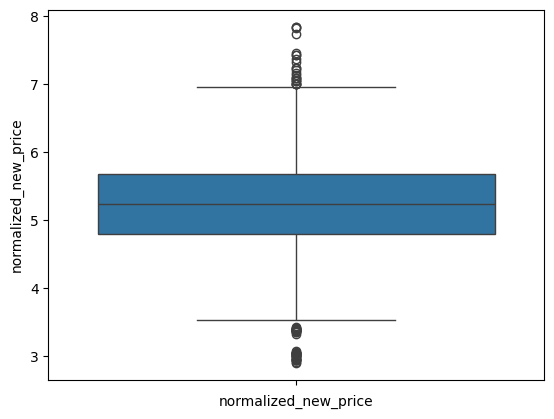

In [ ]:
for i in col:
  sns.histplot(data[i], kde='true')
  plt.xlabel(i)
  plt.xticks(rotation=90)
  plt.show()
  sns.boxplot(data[i])
  plt.xlabel(i)
  plt.show()

In [ ]:
round(data['os'].value_counts(normalize=True),4)

,proportion
os,
Android,0.9305
Others,0.0397
Windows,0.0194
iOS,0.0104


**Observations**

1. Approximately 500 devices are of others brand and the second most preferred 350 devices is of Samsung brand.
2. Android is mostly used Operating System on devices. Approximately 3000 devices have android as O.S or 93.05% devices have android as O.S.
3. 96% devices have others as O.S, 1.93% have windows as O.S and 1.04% have ios as O.S.
4. Screen size preference for devices is approximately 13 cm.
5. Approximately 2300 devices have 4g
6. Approximately 150 devices have 5g
7. Approximately 2600 devices 4 GB of ram.
8. Maximum devices have less than 100GB of internal memory.
9. Approximately 600 devices have 3200 maH battery.
10. Maximum devices are having weight between 100 to 200 gms
11. Devices are launched between 2013-2020. 700 devices are released in 2014, 580 devices in 2013, 500 devices in 2015.
12. Normalized new price and normalized used price follows normal distribution respectively.
13. Approximately 1100 devices have 13 mega pixel main camera and 800 devices have 5 mega pixel selfie camera.
14. Around 300 devices are approximately used for 600 days and around 250 devices are used for approximately 700 days.

**Bivariate Analysis**

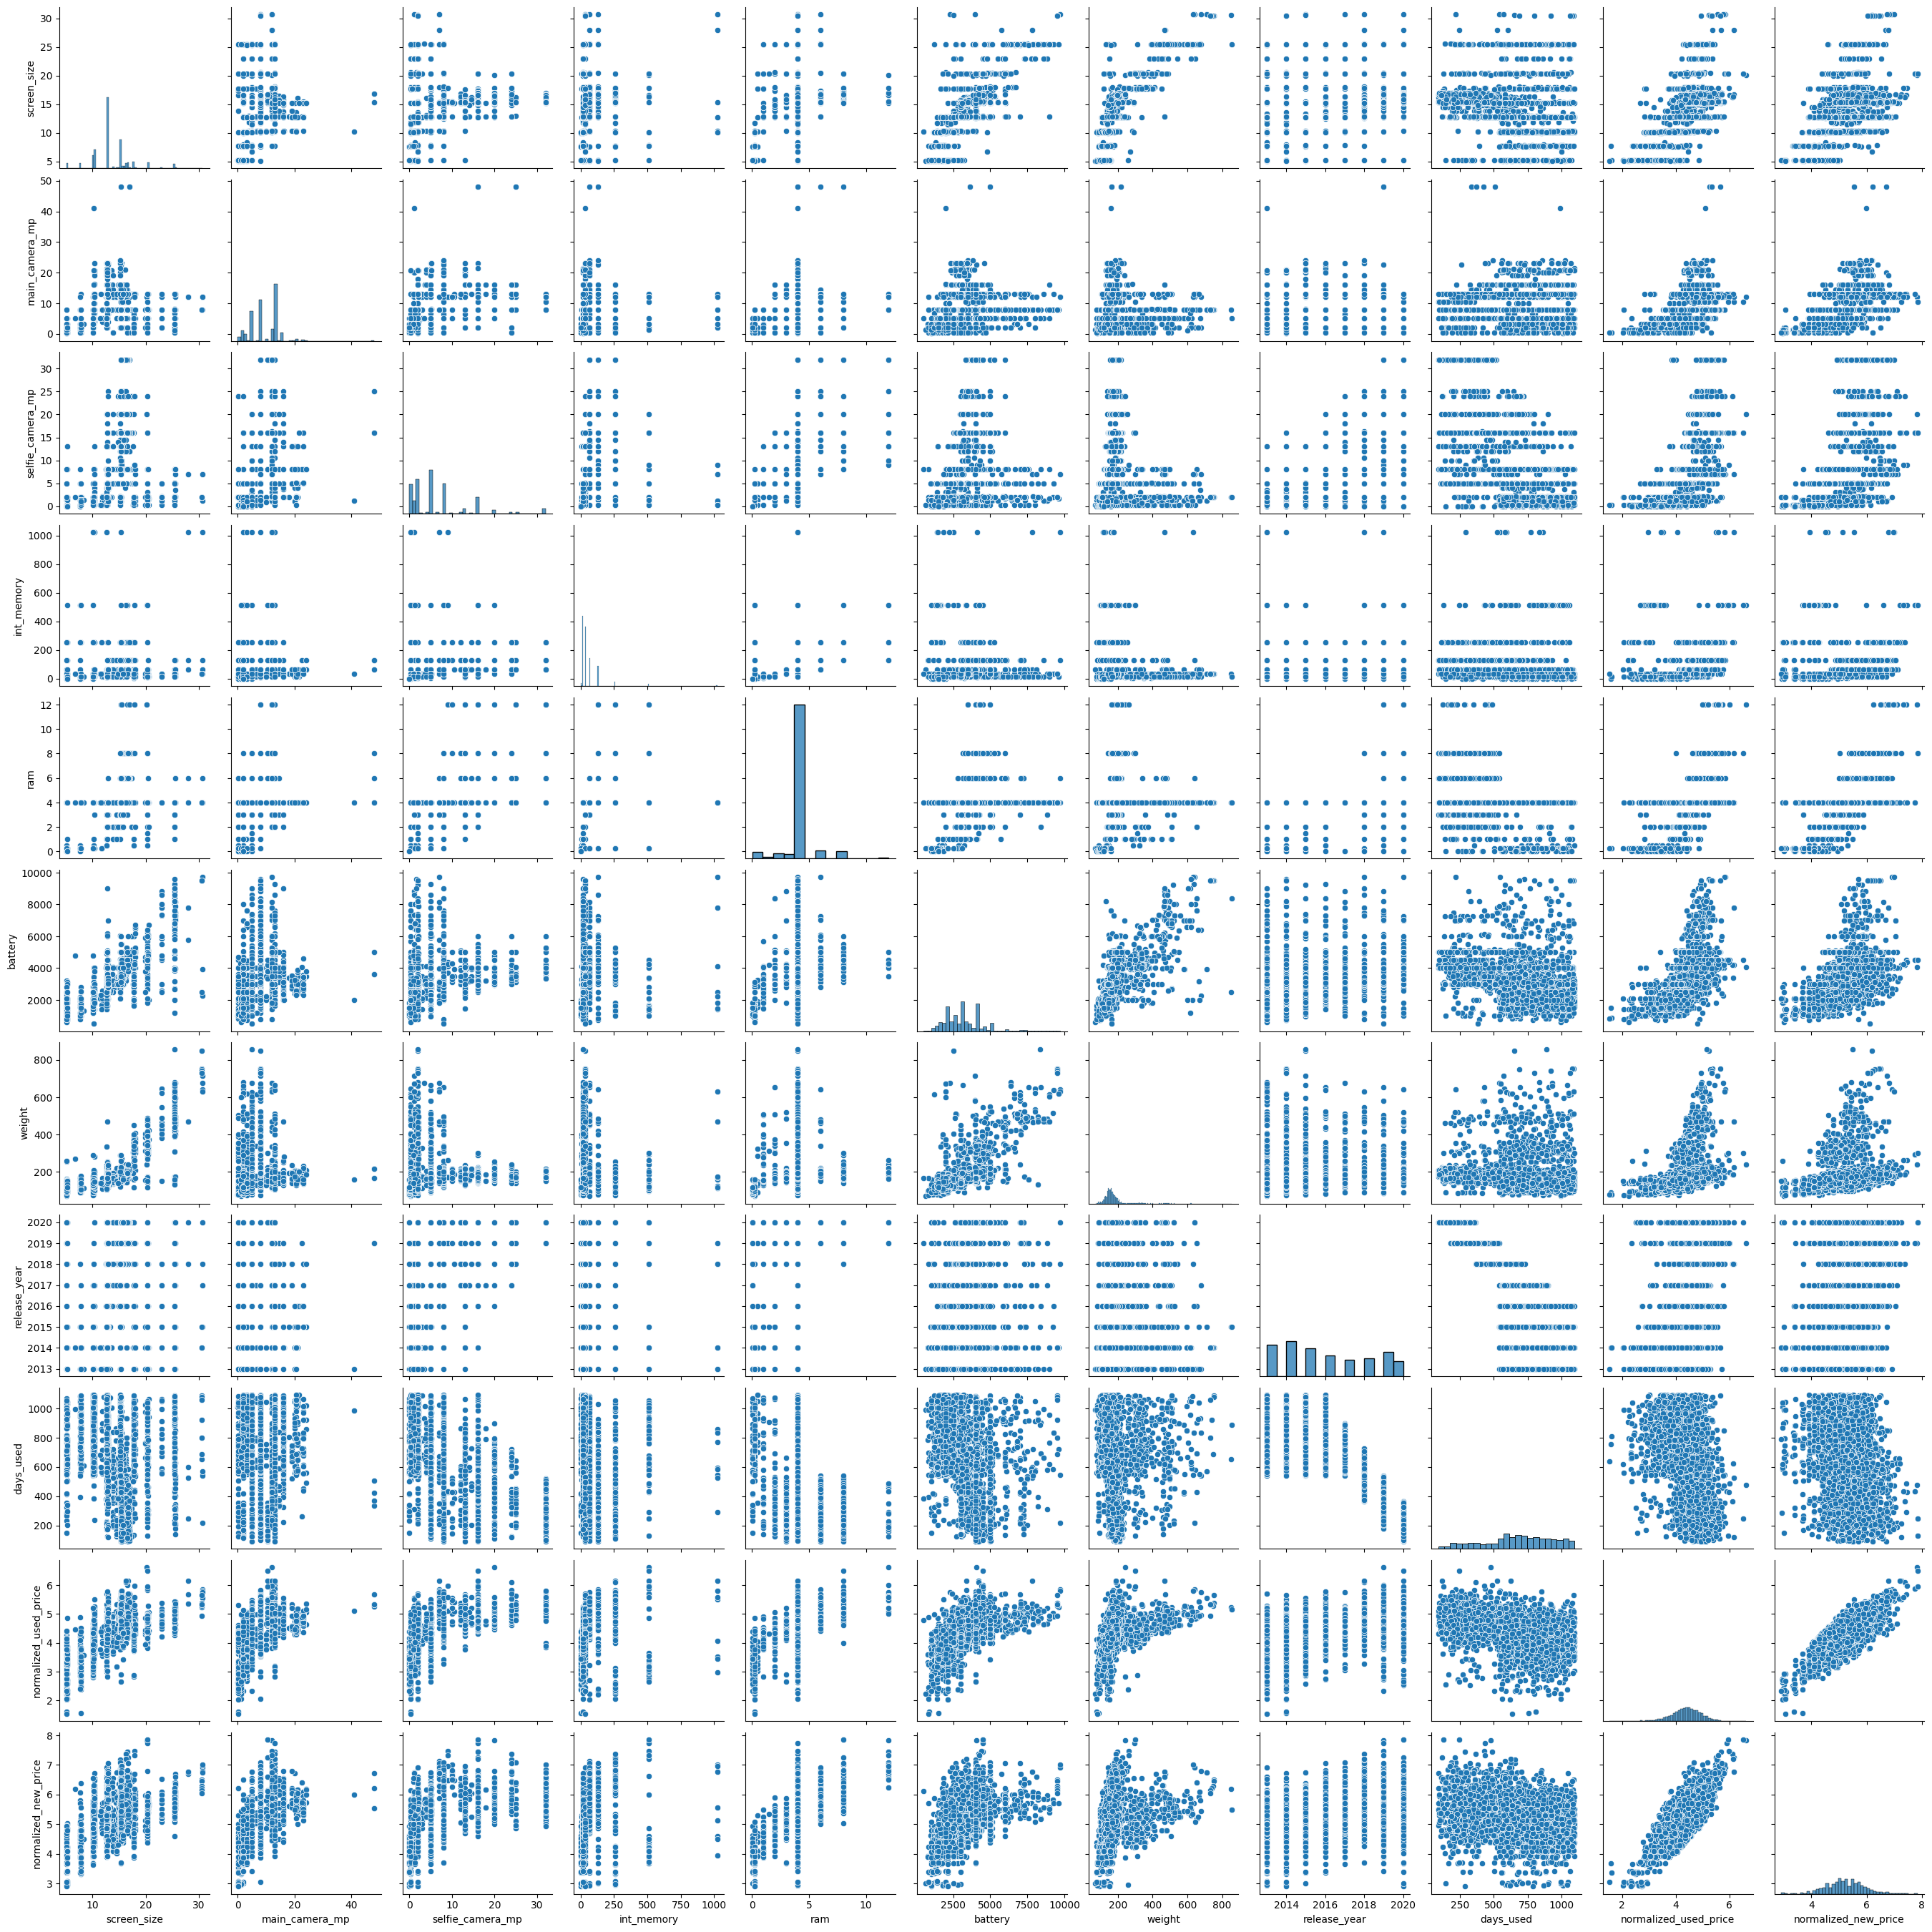

In [ ]:
sns.pairplot(data)
plt.show()

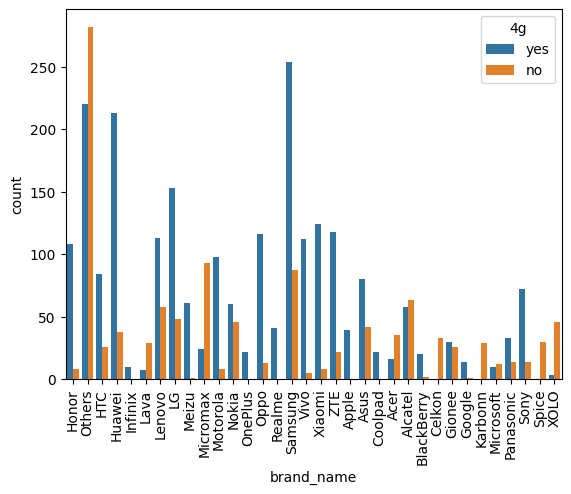

In [ ]:
sns.countplot(x='brand_name', data=data, hue='4g')
figsize=(15,10)
plt.xlabel('brand_name')
plt.xticks(rotation=90)
plt.show()

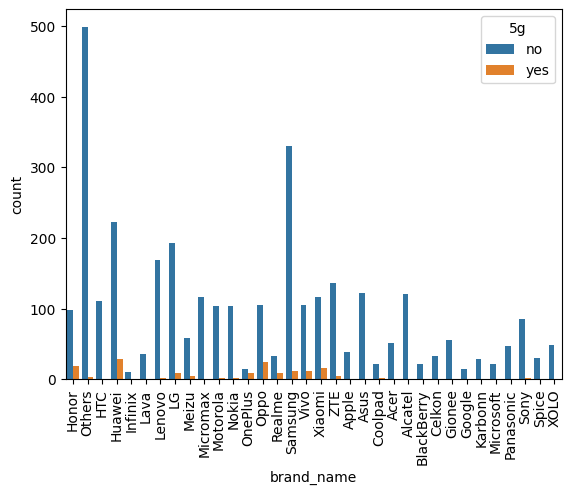

In [ ]:
sns.countplot(x='brand_name', data=data, hue='5g')
figsize=(15,10)
plt.xlabel('brand_name')
plt.xticks(rotation=90)
plt.show()

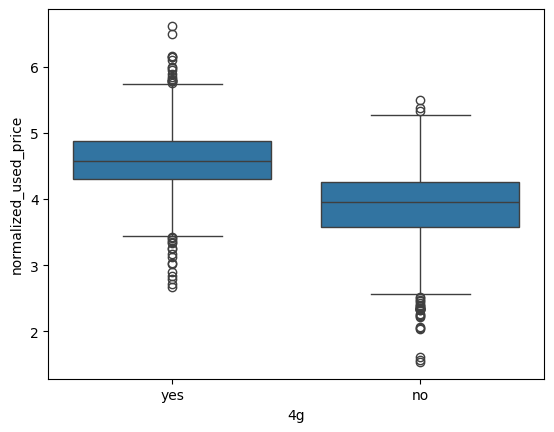

In [ ]:
sns.boxplot(data, x="4g", y="normalized_used_price")
plt.show()

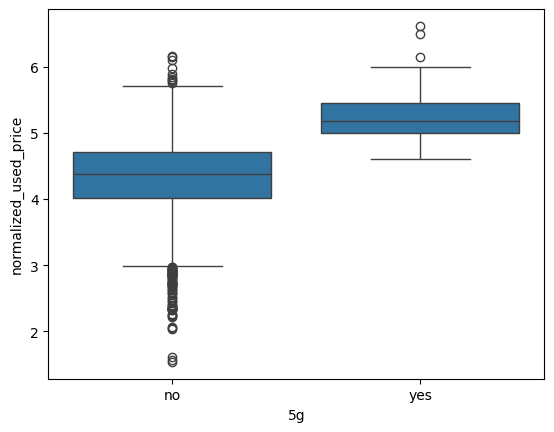

In [ ]:
sns.boxplot(data, x="5g", y="normalized_used_price")
plt.show()

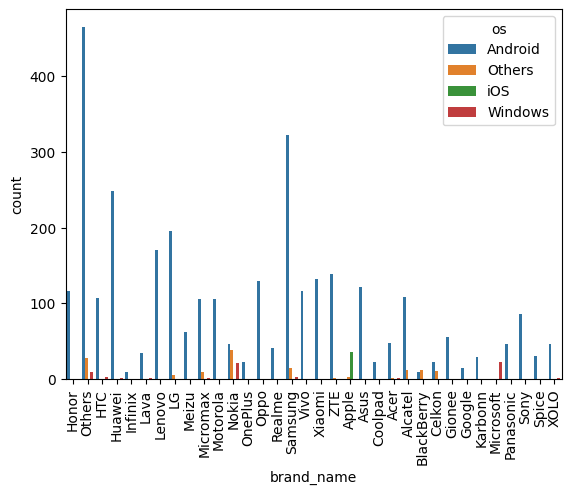

In [ ]:
sns.countplot(x='brand_name', data=data, hue='os')
figsize=(15,10)
plt.xlabel('brand_name')
plt.xticks(rotation=90)
plt.show()

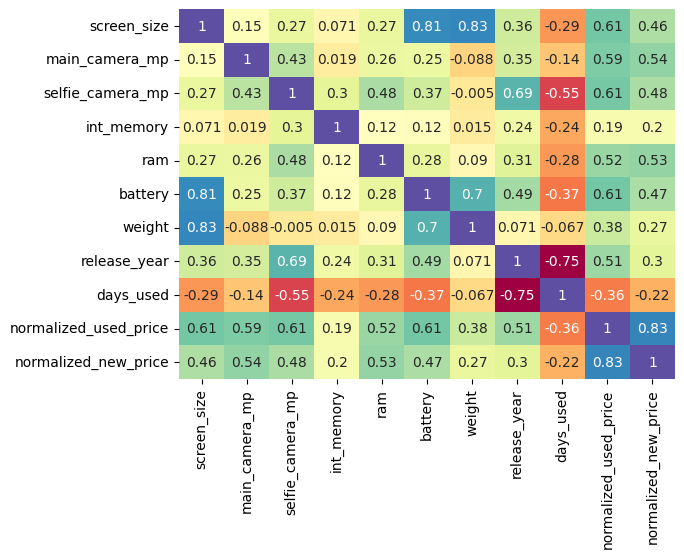

In [ ]:
numerical_data = data.select_dtypes(include=['number'])
numerical_data.drop('release_year', axis=1)
figsize=(15,10)

sns.heatmap(numerical_data.corr(), annot=True,cbar=False, cmap='Spectral')
plt.show()

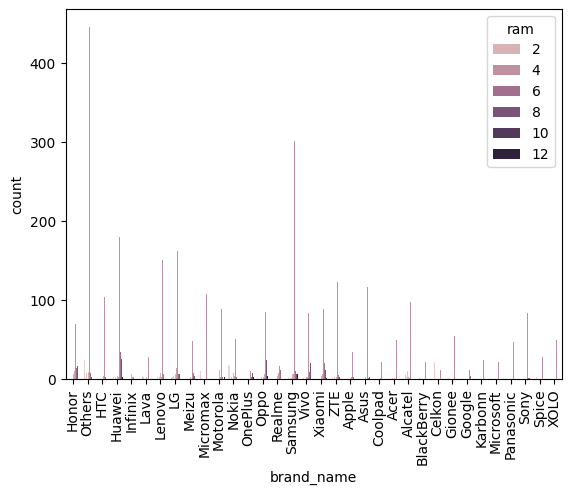

In [ ]:
sns.countplot(x='brand_name', data=data, hue='ram')
figsize=(15,10)
plt.xlabel('brand_name')
plt.xticks(rotation=90)
plt.show()

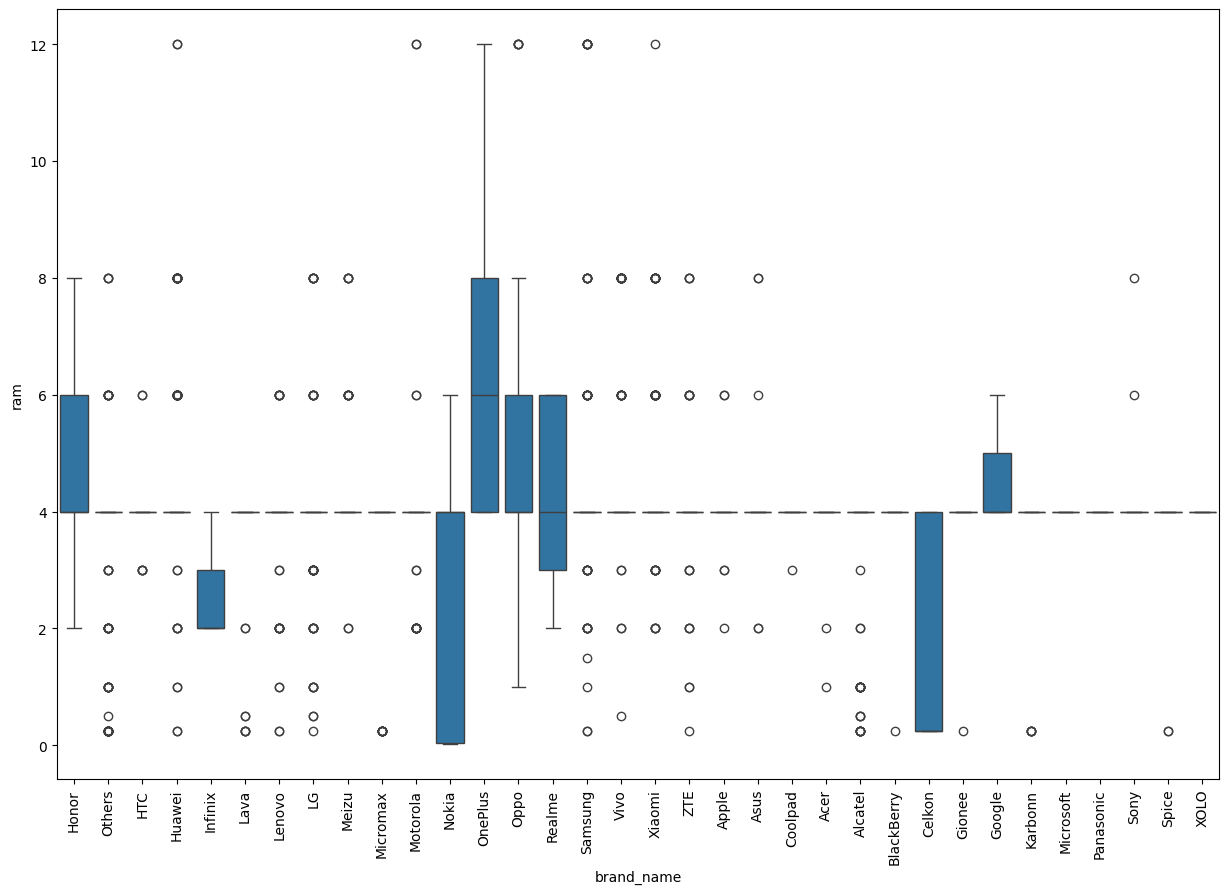

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data, x='brand_name', y='ram')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data[data['battery']> 4500]['weight'].value_counts().head(10)

,count
weight,
195.0,11
185.0,9
199.0,9
208.0,7
460.0,7
310.0,7
210.0,6
498.0,6
469.0,6


In [ ]:
data[data['battery']>4500]['weight'].max()

855.0

In [ ]:
data[data['battery']>4500]['weight'].min()

118.0

In [ ]:
data[data['screen_size']>6]['brand_name'].value_counts()

,count
brand_name,
Others,479
Samsung,334
Huawei,251
LG,197
Lenovo,171
ZTE,140
Xiaomi,132
Oppo,129
Asus,122


In [ ]:
data[data['selfie_camera_mp']>8]['brand_name'].value_counts()

,count
brand_name,
Huawei,87
Vivo,78
Oppo,75
Xiaomi,63
Samsung,57
Honor,41
Others,34
LG,32
Motorola,26


In [ ]:
data.groupby('brand_name')['release_year'].value_counts().sort_values(ascending=False).head(10)

brand_name  release_year
Others      2014            126
            2013            119
            2015             92
Samsung     2014             82
Huawei      2019             67
Samsung     2013             58
            2015             51
Others      2017             48
LG          2014             48
Others      2018             39
Name: count, dtype: int64

In [ ]:
data['release_year'].value_counts().sort_values(ascending=False)

,count
release_year,
2014,642
2013,570
2015,515
2019,446
2016,383
2018,322
2017,299
2020,277


In [ ]:
np.max(data['release_year'])

2020

In [ ]:
data[data['release_year']==2020]['brand_name'].value_counts()

,count
brand_name,
Huawei,38
Honor,36
Realme,24
Xiaomi,23
Samsung,23
Oppo,20
Motorola,18
Others,18
LG,16


**Observations**


1. There exist positive relationship between several attributes like a) Screen size and battery b) screen size and weight c) weight and battery d) selfie camera and release year e) normalized used price and normalized new price
2. Others devices use 2GB of ram. Also samsung use mostly 2GB of ram. Many outliers are present in ram with respect to brand name.
3. 11 devices are there with Weight of 195 gms and Battery > 4500 maH. 9 devices are there with weight of 185 and 199 gms each and battery > 4500 maH. Maximum weight of a device is 855 gms and minimum weight of a device is 118 gms.
4. 479 devices are of others brand with screen size > 6 inches and 334 devices are of Samsung brand with screen size > 6 inches.
5. 87 devices are there with selfie camera >8 of Huawei brand. 78 devices are there of vivo brand and 75 devices of oppo brand.
6. Screen size, selfie camera and battery are positively correlated with normalized used price where as normalized new price and normalized used price are highly correlated.
7. Others launched 126 devices in 2014, 119 devices in 2013 and 92 devices in 2015 while Samsung had launched 92 devices in 2014. Huawei had launched 67 devices in 2019.
8. 642 devices were released in 2014, 570 devices were released in 2013 and 277 in 2020.
9. In 2020, Huawei launched maximum of 38 devices and second largest company to launch devices is Honor with 36 devices.
10. Approximately 250 devices of Samsung brand have 4g and 210 devices of Huawei brand has 4g where as 220 of others have 4g.
11. Very few devices have 5g. Honor, Huawei and Oppo have approximately 30-40 devices using 5g.
12. Approximately 500 devices of Others have android as O.S; 320 devices of Samsung brand have android as O.S; 200devices of Huawei brand has android as O.S and 200 LG brand devices have android as O.S while apple is the only brand who uses ios.

**Data Preprocessing**


Missing value treatment

Feature engineering (if needed)

Outlier detection and treatment (if needed)

Preparing data for modeling

Any other preprocessing steps (if needed)

In [ ]:
data.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


**Observations**


There are null values present in data set. 179 values of main camera mp are missing from data set; 2 values of selfie camera mp are missing from data set; 4 values of ram are missing from data set; 4 values of int memory are missing from data set; 6 values of battery are missing from data set and 7 values of weight are missing from data set.

In [ ]:
df1=data.copy()

In [ ]:
df1['main_camera_mp']=df1['main_camera_mp'].fillna(value=df1.groupby(['release_year','brand_name'])['main_camera_mp'].transform('median'))
df1['int_memory']=df1['int_memory'].fillna(value=df1.groupby(['release_year','brand_name'])['int_memory'].transform('median'))
df1['main_camera_mp']=df1['main_camera_mp'].fillna(value=df1.groupby(['release_year','brand_name'])['main_camera_mp'].transform('median'))
df1['selfie_camera_mp']=df1['selfie_camera_mp'].fillna(value=df1.groupby(['release_year','brand_name'])['selfie_camera_mp'].transform('median'))
df1['ram']=df1['ram'].fillna(value=df1.groupby(['release_year','brand_name'])['ram'].transform('median'))
df1['battery']=df1['battery'].fillna(value=df1.groupby(['release_year','brand_name'])['battery'].transform('median'))
df1['weight']=df1['weight'].fillna(value=df1.groupby(['release_year','brand_name'])['weight'].transform('median'))
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,0
ram,0
battery,6


In [ ]:
df1['main_camera_mp']=df1['main_camera_mp'].fillna(value=df1.groupby(['brand_name'])['main_camera_mp'].transform('median'))
df1['selfie_camera_mp']=df1['selfie_camera_mp'].fillna(value=df1.groupby(['brand_name'])['selfie_camera_mp'].transform('median'))
df1['battery']=df1['battery'].fillna(value=df1.groupby(['brand_name'])['battery'].transform('median'))
df1['weight']=df1['weight'].fillna(value=df1.groupby(['brand_name'])['weight'].transform('median'))
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,10
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


In [ ]:
df1['main_camera_mp']=df1['main_camera_mp'].fillna(value=df1['main_camera_mp'].median())
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


**Observations**

Missing values have been treated.

**Feature engineering**

Taking No of years from 2021 will help in model predictions for used price

In [ ]:
df1['no_of_release_year'] = 2021 - df1['release_year']
df1.drop('release_year', axis=1, inplace=True)
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,no_of_release_year
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


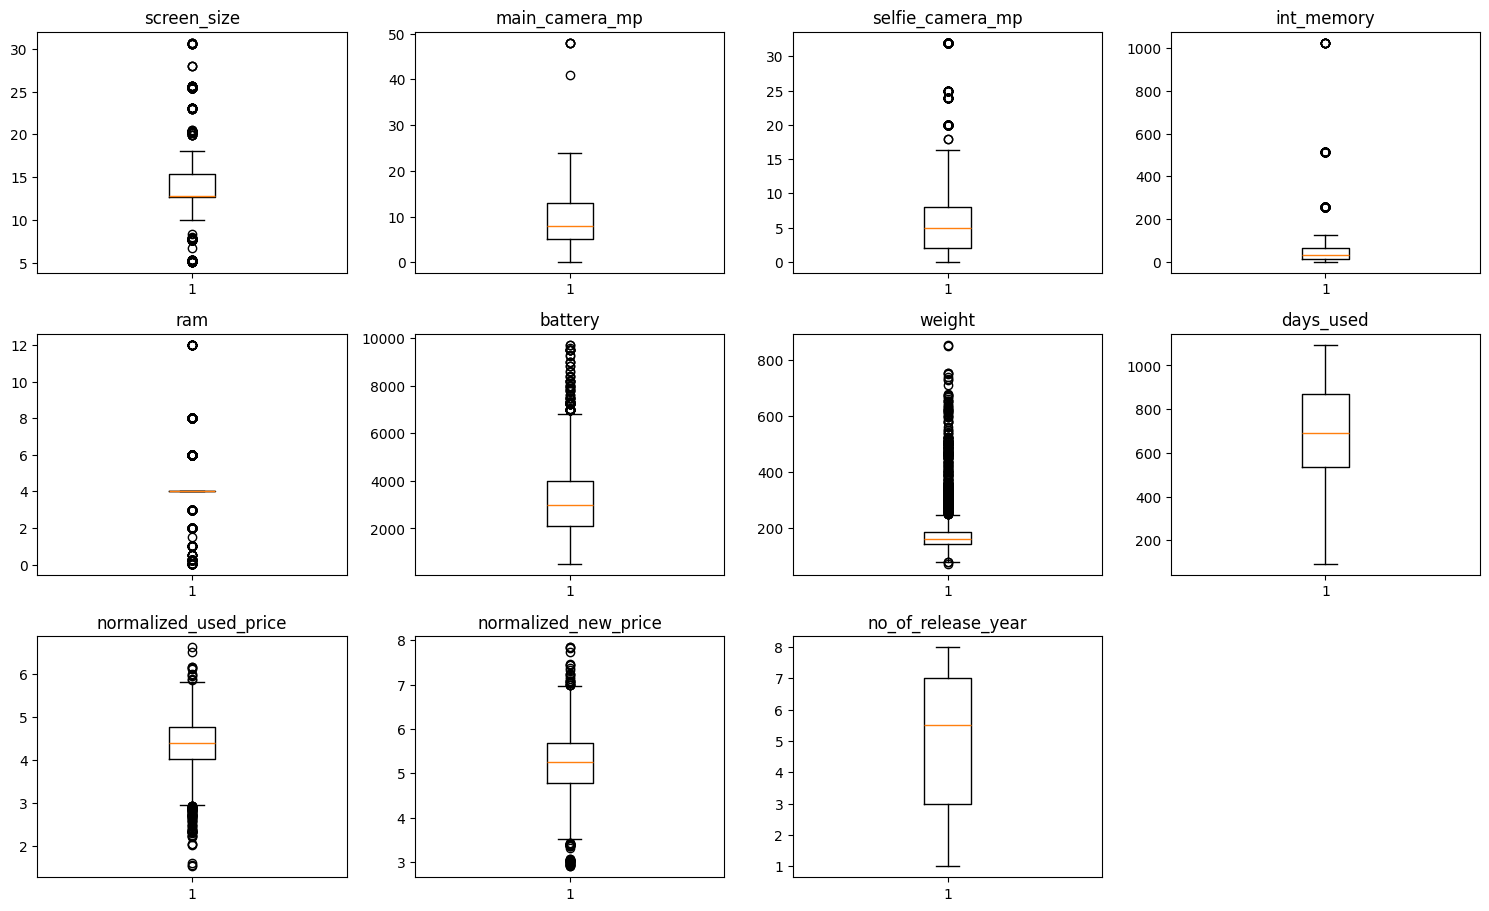

In [ ]:
num_cols = df1.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df1[variable])
    plt.tight_layout()
    plt.title(variable)

plt.show()

**EDA**

It is a good idea to explore the data once again after manipulating it.

In [ ]:
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


**Observations**

Now, null values have been treated.

**Model Building - Linear Regression**

In [ ]:
X=df1.drop(['normalized_used_price'], axis=1)
y=df1['normalized_used_price']
print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  no_of_release_year  
0              4.715100                   1  
1              5.519018                   1  
2              5.884631                   1  
3              5.63096

In [ ]:
X=sm.add_constant(X)

In [ ]:
X=pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,False,False,False,False,False,False,False,False,True,False
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,False,False,False,False,False,False,False,False,True,True
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,False,False,False,False,False,False,False,False,True,True
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,False,False,False,False,False,False,False,False,True,True
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print('Number of rows in  x train set:', X_train.shape[0])
print('Number of rows in x test set:',X_test.shape[0])
print('Number of rows in y train set:',y_train.shape[0])
print('Number of rows in y test set:',y_test.shape[0])

Number of rows in  x train set: 2417
Number of rows in x test set: 1037
Number of rows in y train set: 2417
Number of rows in y test set: 1037


In [ ]:
X_train = X_train.astype(float)
y_train = y_train.astype(float)

olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.849
Model:                               OLS   Adj. R-squared:                  0.846
Method:                    Least Squares   F-statistic:                     277.1
Date:                   Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                           01:15:25   Log-Likelihood:                 125.15
No. Observations:                   2417   AIC:                            -152.3
Df Residuals:                       2368   BIC:                             131.4
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations**


**Adjusted. R-squared:** The value for Adj. R square is 84.6% and R square is 84.9%. It means model explains 84.9% variance.

**const coefficient:** The constant value is 1.41

**Model Performance Check**

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# targets : observed value or y
# predictions : y hat which is predicted value
# predictors : x variable or independent variables

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE


    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229761,0.178533,0.848887,0.845758,4.293664


In [ ]:
print("Testing Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239062,0.188692,0.832176,0.823844,4.513288


**Observations**


As R square and Adj. R square for training and test performance are comparable. Therefore, we can say neither model is underfitting nor it is overfitting.

**Checking Linear Regression Assumptions**

In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

**Test for multicollinearity using VIF**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

,feature,VIF
0,const,232.676933
1,screen_size,8.262147
2,main_camera_mp,2.418167
3,selfie_camera_mp,2.872720
4,int_memory,1.363390
5,ram,2.283507
6,battery,4.066126
7,weight,6.417982
8,days_used,2.580338
9,normalized_new_price,3.218722


**Observations**


As Screen Size and weight have VIF >5. Therefore, we will treat multicollinearity and will drop the column which has approximately same Adj. R square as compared to model Adj. R square. The information provided by this column is already explained by other variables, therefore, we will drop this column.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_names = ['screen_size','weight']
treating_multicollinearity(X_train, y_train, col_names)

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.843587,0.233803
1,screen_size,0.841348,0.235470


**Observations**

As Adj. R square of weight is 84.3 and model Adj. R square is 84.6. Therefore, will drop weight column.

In [ ]:
col_to_drop = "weight"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

In [ ]:
checking_vif(X_train2)

,feature,VIF
0,const,217.374254
1,screen_size,3.687059
2,main_camera_mp,2.338735
3,selfie_camera_mp,2.840740
4,int_memory,1.363340
5,ram,2.279885
6,battery,3.768114
7,days_used,2.563460
8,normalized_new_price,3.217341
9,no_of_release_year,4.753660


In [ ]:
olsmod1 = sm.OLS(y_train, X_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     278.2
Date:                   Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                           01:16:00   Log-Likelihood:                 107.24
No. Observations:                   2417   AIC:                            -118.5
Df Residuals:                       2369   BIC:                             159.5
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations**

Earlier R square and Adj. R square is 84.9% and 84.6% respectively. After dropping, it is still comparable with R square and Adj. R square as 84.7% and 84.4%. It implies even after dropping column, model R square and Adj. R square has not impacted much.

**Significance test using p-values**

In [ ]:
predictors = X_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_variables = cols
print(selected_variables)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'normalized_new_price', 'no_of_release_year', 'brand_name_Celkon', 'brand_name_Nokia', 'brand_name_Xiaomi', '4g_yes', '5g_yes']


In [ ]:
X_train3 = X_train2[selected_variables]
X_test3 = X_test2[selected_variables]

In [ ]:
olsmod2 = sm.OLS(y_train, X_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     1089.
Date:                   Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                           01:16:10   Log-Likelihood:                 91.640
No. Observations:                   2417   AIC:                            -157.3
Df Residuals:                       2404   BIC:                            -82.01
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co


**Observations**


Earlier R square and Adj. R square is 84.9% and 84.6% respectively. After dropping columns with p>0.05, it is still comparable with R square and Adj. R square as 84.5% and 84.4%. It implies even after dropping column, model R square and Adj. R square has not impacted much.

In [ ]:
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, X_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232968,0.180776,0.844638,0.843797,4.351499


In [ ]:
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, X_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241774,0.191237,0.828346,0.826164,4.572191


**Observations**

As Adj. R square for training and test performance is comparable. Therefore, will say model is neither underfitting nor overfitting.

**Linearity check**

It is done by plotting fitted values v/s residuals.

In [ ]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train # these are actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues #these are predicted values or observed value
df_pred["Residuals"] = olsmod2.resid  #these are residuals values
df_pred.head()

,Actual Values,Fitted Values,Residuals
1744,4.261975,4.306619,-0.044644
3141,4.175156,3.817341,0.357816
1233,4.117410,4.439045,-0.321635
3046,3.782597,3.839466,-0.056869
2649,3.981922,3.934184,0.047738


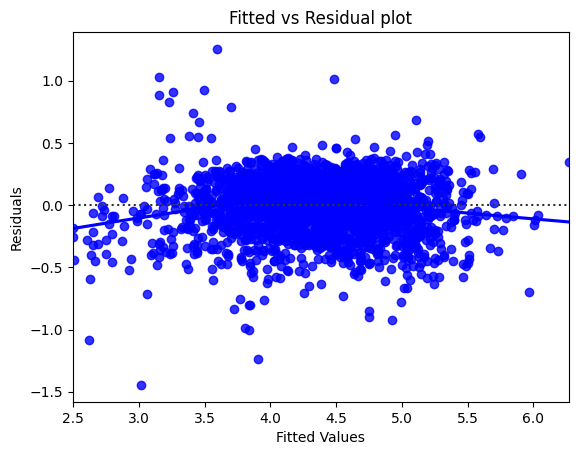

In [ ]:
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="blue", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations**

As there is no pattern, therefore, model is linear and residuals are independent.

**Normality check**

Normality is checked by histogram, Q-Q plot and Shapiro test.

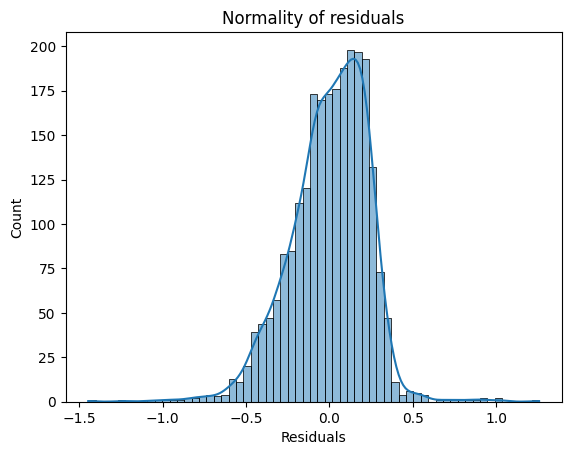

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

**Observations**

It shows a normal distribution. Let us check it on Q-Q plot.

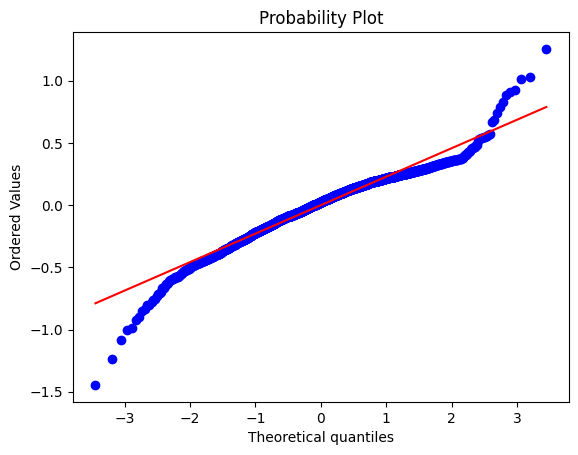

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observations**

It follows normal distribution except left and right tail.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=np.float64(0.9657157759062185), pvalue=np.float64(1.5335718841160654e-23))

**Observations**

As p<0.05, it does not follow normal distribution as per Shapiro test but as per histogram and Q-Q plot it follows normal distribution. Therefore, assumption is satisfied. Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test. Strictly speaking, the residuals are not normal. However, as an approximation, can accept this distribution as close to being normal. So, the assumption is satisfied.

**Homoscedasticity test**

Homoscedascity: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

Heteroscedascity: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
lzip(name, test)

[('F statistic', np.float64(0.9283461097428181)),
 ('p-value', np.float64(0.9005938421351554))]

**Observations**

As p>0.05, therefore, residuals follow homoscedasticity and assumption is satisfied.

**Predictions on test set**

In [ ]:
pred = olsmod2.predict(X_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=42)

,Actual,Predicted
1041,5.007497,4.730652
3161,3.929470,4.294489
471,4.721886,4.484806
718,4.342896,4.587495
927,3.853122,3.652756
1042,3.745968,3.723059
2126,4.842374,4.799079
1192,3.948355,3.898354
2247,4.330996,4.13116
7,4.729421,4.601141


**Final Model**

In [ ]:
X_train_final = X_train3.copy()
X_test_final = X_test3.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, X_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     1089.
Date:                   Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                           01:16:41   Log-Likelihood:                 91.640
No. Observations:                   2417   AIC:                            -157.3
Df Residuals:                       2404   BIC:                            -82.01
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, X_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232968,0.180776,0.844638,0.843797,4.351499


In [ ]:
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, X_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241774,0.191237,0.828346,0.826164,4.572191


**Observations**

After treating multicollinearity and checking the assumptions, can say this is the best fit model. Also Adj. R square for training and test performance is comparable. Therefore, will say model is neither underfitting nor overfitting. R square is 84.5% and Adj. R square is 84.4%.

In [ ]:
print("Used Price", "=")
for i in range(len(X_train3.columns)):
  if i==0:
    print(olsmodel_final.params[i], "+", end=" ")
  else:
    print(olsmodel_final.params[i], "(", X_train3.columns[i], ")")

Used Price =
1.2482899580146274 + 0.04431569074797301 ( screen_size )
0.021798118059484742 ( main_camera_mp )
0.010913813687664996 ( selfie_camera_mp )
0.0001859688258678189 ( int_memory )
0.02796499014475968 ( ram )
0.41210140265773176 ( normalized_new_price )
-0.01566865222184855 ( no_of_release_year )
-0.1852027442503634 ( brand_name_Celkon )
0.08848464486845073 ( brand_name_Nokia )
0.07793211610812573 ( brand_name_Xiaomi )
0.03693241251264092 ( 4g_yes )
-0.08730842189807496 ( 5g_yes )


<ipython-input-71-51dd05262bc1>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(olsmodel_final.params[i], "+", end=" ")
<ipython-input-71-51dd05262bc1>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(olsmodel_final.params[i], "(", X_train3.columns[i], ")")



**Observations**

Therefore, attributes helping in predicting used price are screen size, main camera mp, selfie camera mp, int memory, ram, normalized new price, no of release year, brand name Celkon, brand name Nokia, brand name Xiaomi, 4g yes and 5 g yes.

**Actionable Insights and Recommendations**

1. A unit increase in main camera mp will increase used price by 0.021 units, all other variables held constant.
2. If selfie camera mp increase by 1 unit, used price will increase by 0.10 units, all other variables held constant.
3. A unit increase in int memory will increase used price by 0.00018 units, all other variables held constant.
4. A unit increase in ram will increase used price by 0.027 units, all other variables held constant.
5. A unit increase in normalized new price will increase used price by 0.412 units, all other variables held constant.
6. A unit increase in no of release year will decrease used price by 0.015 units, all other variables held constant.
7. The used price for brand name Celkon is 0.18 units less than brand name Alcatel
8. The used price for brand name Celkon is 0.08 units more than brand name Alcatel
9. The used price for brand name Celkon is 0.07 units more than brand name Alcatel
10. The used price for devices having 4g is 0.036 units more than devices not having 4g
11. The used price for devices having 5g is 0.087 units less than devices not having 5g
12. Company can focus on others and Samsung Brand.
13. Majority of devices use Android as O.S, therefore, used devices for android is more profitable as compared to other O.S.
14. 50% of devices have screen size 13 cm
15. More devices have 4g as compared to 5g.
16. Internal memory for most of the devices is less than 100GB.
17. Company can focus on devices with 13mp main camera and 5mp selfie camera.
18. Several variables have positive relationship with each other such as:- Screen size and battery; screen size and weight; weight and battery; selfie camera and release year; normalized used price and normalized new price. It means if one of the variable with increase the other will also increase. For example, if size of selfie camera in mp increases, it means release year will also be upgraded or increased.
19. Attributes helping in predicting used price are screen size, main camera mp, selfie camera mp, int memory, ram, normalized new price, no of release year, brand name Celkon, brand name Nokia, brand name Xiaomi, 4g yes and 5 g yes.